In [1]:
import pandas as pd

In [3]:
age_train = pd.read_csv('./input/age_train.csv', header=None)
age_test = pd.read_csv('./input/age_test.csv', header=None)
userInfo = pd.read_csv('./input/user_basic_info.csv', header=None)
userBehavior = pd.read_csv('./input/user_behavior_info.csv', header=None)

In [4]:
userInfo.columns=['uId', 'gender', 'city', 'prodName', 'ramCapacity', 'ramLeftRation', 'romCapacity', 'romLeftRation', 'color', 'fontSize', 'ct', 'carrier', 'os']
age_train.columns=['uId', 'age_group']
age_test.columns=['uId']
userBehavior.columns=['uId', 'bootTimes', 'AFuncTimes', 'BFuncTimes', 'CFuncTimes', 'DFuncTimes', 'EFuncTimes', 'FFuncTimes', 'FFuncSum']

In [5]:
#将user_basic_info.csv 和 user_behavior_info.csv中的字符值编码成可以训练的数值类型，合并
class2id = {}
id2class = {}
def mergeBasicTables(baseTable):
    resTable = baseTable.merge(userInfo, how='left', on='uId', suffixes=('_base0', '_ubaf'))
    resTable = resTable.merge(userBehavior, how='left', on='uId', suffixes=('_base1', '_ubef'))
    cat_columns = ['city','prodName','color','carrier','os','ct']
    for c in cat_columns:
        resTable[c] = resTable[c].apply(lambda x: x if type(x)==str else str(x))
        sort_temp = sorted(list(set(resTable[c])))  
        class2id[c+'2id'] = dict(zip(sort_temp, range(1, len(sort_temp)+1)))
        id2class['id2'+c] = dict(zip(range(1,len(sort_temp)+1), sort_temp))
        resTable[c] = resTable[c].apply(lambda x: class2id[c+'2id'][x])
        
    return resTable

In [6]:
trainData = mergeBasicTables(age_train)
testData = mergeBasicTables(age_test)
trainLabel = age_train.age_group

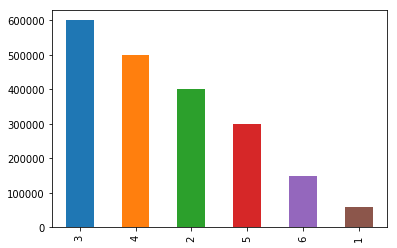

In [18]:
trainData.age_group.value_counts().plot(kind="bar")

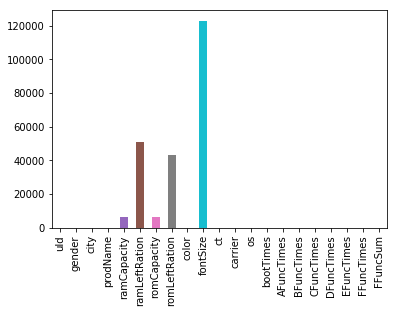

In [16]:
testData.isnull().sum().plot(kind='bar')

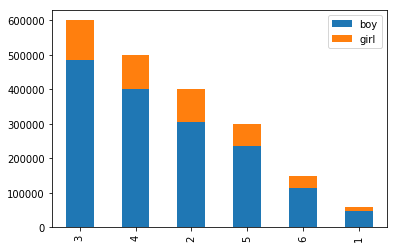

In [20]:
boy = trainData.age_group[trainData.gender == 0].value_counts()
girl = trainData.age_group[trainData.gender == 1].value_counts().sort()
df = pd.DataFrame({u'boy': boy, u'girl': girl})
df.plot(kind='bar', stacked=True)